Test Notebook to work on Spotify songs' popularity prediction while trying to have a Green AI approach

In [1]:
#Librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import codecarbon
from codecarbon import EmissionsTracker
import warnings
warnings.filterwarnings('ignore')
import torch

The dataset, quickly

In [2]:
spotify_songs = pd.read_csv('/Users/camille.hascoet/Documents/Green AI/Datasets/tracks.csv')
spotify_songs.head()
#number of rows
dataset_length = len(spotify_songs)
print(dataset_length)

586672


In [3]:
#The 10 most popular songs
spotify_songs.sort_values(by='popularity', ascending=False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


In [4]:
#extract the features
X = spotify_songs.drop(['popularity', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1)
y = spotify_songs['popularity']

In [5]:
# find correlation between features and target
correlation = X.corrwith(y)
correlation = correlation.sort_values(ascending=False)
correlation

loudness            0.327028
energy              0.302315
explicit            0.211758
danceability        0.187000
time_signature      0.086759
tempo               0.071364
duration_ms         0.027681
key                 0.015299
valence             0.004643
mode               -0.033655
speechiness        -0.047357
liveness           -0.048740
instrumentalness   -0.236487
acousticness       -0.370882
dtype: float64

In [6]:
X_drop = X.drop(['mode', 'valence', 'key', 'duration_ms', 'speechiness', 'liveness'], axis=1)

In [7]:
class NN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, 10),
            torch.nn.ReLU(),
        )

        self.output = torch.nn.Linear(10, output_size)
    def forward(self, x):
        x = self.linear_relu_stack(x)
        x = self.output(x)
        return x
    
class QAT_NN(torch.nn.Module):
    def __init__(self, model):
        super(QAT_NN, self).__init__()
        self.quant = torch.quantization.QuantStub()
        self.model = model
        self.dequant = torch.quantization.DeQuantStub()
        self.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')

    def forward(self, x):
        x = self.quant(x)
        x = self.model(x)
        x = self.dequant(x)
        return x
    
def train_model(model, X, y, criterion, optimizer, max_epoch = 20):

    model.train()

    emissions_tracker = EmissionsTracker(log_level='error', save_to_file=False, save_to_api=False, save_to_logger=False)
    emissions_tracker.start()
    emissions_qat = []
    losses_qat = []

    batch_size = 200

    for epoch in range(max_epoch):
        emissions_tracker.start_task()
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward and optimize

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch +1)% 2 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, max_epoch, loss.item()))
        losses_qat.append(loss.item())
        emissions_qat.append(emissions_tracker.stop_task().emissions)

    total_emissions_qat = emissions_tracker.stop()
    return losses_qat, emissions_qat, total_emissions_qat

def calibrate_model(model, X, device):
    model = model.to(device)
    model = model.eval()
    for x in X:
        x = x.to(device)
        model(x)
    return model
    

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X_drop)
y_scaled = y.values.reshape(-1, 1) / 100

#shuffle and take 20000 samples
from sklearn.utils import shuffle

X_shuffled, y_shuffled = shuffle(X_scaled, y_scaled, random_state=1234)

X_train = X_shuffled[:20000]
y_train = y_shuffled[:20000]

X_test = X_shuffled[20000:25000]
y_test = y_shuffled[20000:25000]

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

input_size = X_train.shape[1]
hidden_size = 400
output_size = 1

In [9]:
model_normal = NN(input_size, hidden_size, output_size)

normal_criterion = torch.nn.L1Loss()
normal_optimizer = torch.optim.Adam(model_normal.parameters(), lr=0.01)

losses_normal, emissions_normal, total_emissions_normal = train_model(model_normal, X_train, y_train, normal_criterion, normal_optimizer)

Epoch [2/20], Loss: 0.1596
Epoch [4/20], Loss: 0.1596
Epoch [6/20], Loss: 0.1597
Epoch [8/20], Loss: 0.1597
Epoch [10/20], Loss: 0.1597
Epoch [12/20], Loss: 0.1597
Epoch [14/20], Loss: 0.1597
Epoch [16/20], Loss: 0.1598
Epoch [18/20], Loss: 0.1598
Epoch [20/20], Loss: 0.1596


In [10]:
import copy

model_to_quantize = copy.deepcopy(model_normal)
model_int8 = QAT_NN(model_to_quantize)

model_int8.qconfig = torch.quantization.get_default_qconfig('fbgemm')
torch.quantization.prepare_qat(model_int8, inplace=True)
int8_optimizer = torch.optim.Adam(model_int8.parameters(), lr=0.01)

losses_qat, emissions_qat, total_emissions_qat = train_model(model_int8, X_train, y_train, normal_criterion, int8_optimizer)

model_int8 = torch.quantization.convert(model_int8, inplace = True)


Epoch [2/20], Loss: 0.1598
Epoch [4/20], Loss: 0.1598
Epoch [6/20], Loss: 0.1598
Epoch [8/20], Loss: 0.1598
Epoch [10/20], Loss: 0.1598
Epoch [12/20], Loss: 0.1598
Epoch [14/20], Loss: 0.1596
Epoch [16/20], Loss: 0.1597
Epoch [18/20], Loss: 0.1597
Epoch [20/20], Loss: 0.1598


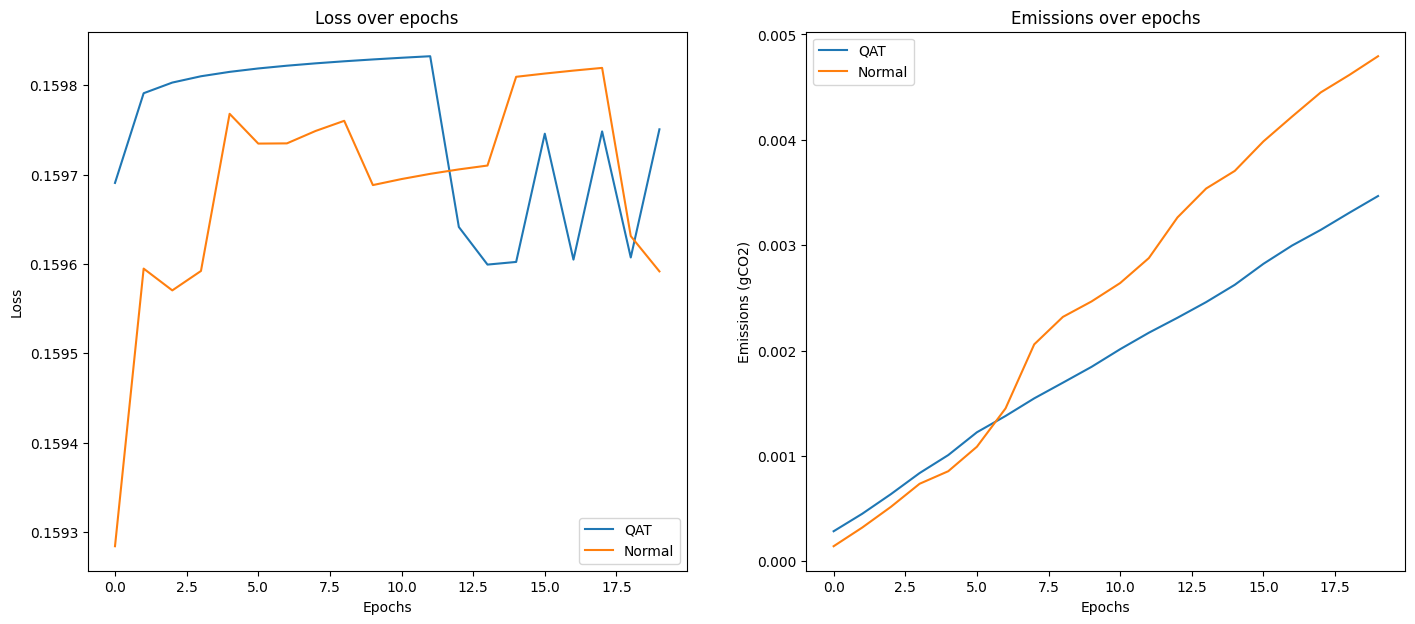

In [11]:
#compare the emissions and losses over the epochs
cumsum_emissions_qat = np.cumsum(emissions_qat) * 1000
cumsum_emissions_normal = np.cumsum(emissions_normal) * 1000

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(losses_qat, label='QAT')
plt.plot(losses_normal, label='Normal')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cumsum_emissions_qat, label='QAT')
plt.plot(cumsum_emissions_normal, label='Normal')
plt.title('Emissions over epochs')
plt.xlabel('Epochs')
plt.ylabel('Emissions (gCO2)')
plt.legend()
plt.show()




In [12]:
print('Total emissions QAT: {:.4f} gCO2'.format(total_emissions_qat*1000))

print('Total emissions Normal: {:.4f} gCO2'.format(total_emissions_normal*1000))

Total emissions QAT: 0.0035 gCO2
Total emissions Normal: 0.0048 gCO2


In [13]:
# compare both models inference time
import time
import codecarbon
from codecarbon import EmissionsTracker

def inference_time(model, X_test, num_iterations = 100, warm_up = 10):

    tracker = EmissionsTracker(log_level='critical', save_to_file=False, save_to_api=False, save_to_logger=False)
    tracker.start()

    model = model.eval()

    for i in range(warm_up):
        model(X_test)

    start = time.time()

    for i in range(num_iterations):
        model(X_test)

    end = time.time()
    total_emissions = tracker.stop()

    return (end - start) / num_iterations, total_emissions / num_iterations

In [14]:
int8_inference_time, int8_emissions = inference_time(model_int8, X_test)

fp32_inference_time, fp32_emissions = inference_time(model_normal, X_test)

print(f"FP32 Inference Time: {fp32_inference_time}")

print(f"INT8 Inference Time: {int8_inference_time}")

FP32 Inference Time: 0.019961390495300293
INT8 Inference Time: 0.012851719856262206


In [17]:
#dataframe of the results
results = pd.DataFrame({
    'Model': ['Normal', 'QAT'],
    'Inference time (s)': [fp32_inference_time, int8_inference_time],
    'Inferece emissions (gCO2)': [fp32_emissions*1000, int8_emissions*1000],
    'Loss': [losses_normal[-1], losses_qat[-1]],
    'Training emissions (gCO2)': [total_emissions_normal*1000, total_emissions_qat*1000]
})

results

,Model,Inference time (s),Inferece emissions (gCO2),Loss,Training emissions (gCO2)
0,Normal,0.019961,0.000005,0.159592,0.004795
1,QAT,0.012852,0.000003,0.159751,0.003467


In [16]:
import os

def print_model_size(mdl):
    torch.save(mdl.state_dict(), "tmp.pt")
    print("%.2f MB" %(os.path.getsize("tmp.pt")/1e6))
    os.remove('tmp.pt')

print_model_size(model_normal)

print_model_size(model_int8)


1.32 MB
0.36 MB
